# Python and R

In [10]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# show all columns on pandas dataframes
pd.set_option('display.max_columns', None)


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [12]:
%%R

# My commonly used R imports

require('tidyverse')



# Read the data



The cell below loads the data in python:

In [13]:
df = pd.read_csv('raw-polls.csv')
df.sample(5)

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,bias,rightcall,comment
5705,32818,39415,1530,2010,2010_Sen-G_NY,NY,Sen-G,Sen-G,YouGov,391,Online,NaN,10/30/10,578.0,Charles E. Schumer,957,DEM,60.0,Jay Townsend,959,REP,34.0,NaN,26.0,11/2/10,66.32,32.21,34.11,-8.11,1.0,NaN
9001,56356,90592,116,2018,2018_Sen-G_ND,ND,Sen-G,Sen-G,Strategic Research Associates,462,Live Phone,NaN,10/16/18,650.0,Heidi Heitkamp,11148,DEM,40.0,Kevin Cramer,11149,REP,56.0,NaN,-16.0,11/6/18,44.27,55.11,-10.84,-5.16,1.0,for Gray Television
3845,2145,2720,7416,2008,2008_Pres-D_IN,IN,Pres-P,Pres-D,Zogby Interactive/JZ Analytics,395,Live Phone,NaN,5/1/08,680.0,Hillary Rodham Clinton,45,DEM,42.0,Barack Obama,41,DEM,42.0,NaN,0.0,5/6/08,50.56,49.44,1.11,NaN,0.5,NaN
3346,2900,3545,7338,2008,2008_Pres-R_SC,SC,Pres-P,Pres-R,Mason-Dixon Polling & Strategy,197,Live Phone,NaN,1/15/08,400.0,John McCain,44,REP,27.0,Mike Huckabee,47,REP,25.0,13.0,2.0,1/19/08,33.15,29.84,3.31,NaN,1.0,NaN
4913,64366,118418,1801,2009,2009_House-GS_CA-10,CA-10,House-G,House-GS,SurveyUSA,325,IVR,NaN,10/27/09,581.0,John Garamendi,14432,DEM,50.0,David Harmer,14433,REP,40.0,NaN,10.0,11/3/09,52.85,42.83,10.02,-0.02,1.0,NaN


The cell below loads the same data in R:

In [14]:
%%R

df <- read_csv('raw-polls.csv')

df

Rows: 10776 Columns: 31
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): race, location, type_simple, type_detail, pollster, methodology, p...
dbl (17): poll_id, question_id, race_id, year, pollster_rating_id, samplesiz...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 10,776 × 31
   poll_id questio…¹ race_id  year race  locat…² type_…³ type_…⁴ polls…⁵ polls…⁶
     <dbl>     <dbl>   <dbl> <dbl> <chr> <chr>   <chr>   <chr>   <chr>     <dbl>
 1   26013     87909    1455  1998 1998… NY      Gov-G   Gov-G   Blum &…      32
 2   26255     87926    1456  1998 1998… OH      Gov-G   Gov-G   Univer…     346
 3   26026     31266    1736  1998 1998… NV      Sen-G   Sen-G   FM3 Re…      91
 4   26013     31253    1738  1998 1998… NY      Sen-G   Sen-G   Blum &…      32
 5   63632    117103    1738  1998 1998… NY      Sen-G 

# Guided Exploration

In this section you'll make a few charts to explore the data. Here I will raise some questions for you to dig around in the data and answer. You can use summary statistics and/or charts to help answer the questions. You will have to make some methodological choices along the way. Be aware of what choices you're making! I'll ask you about them shortly.


## Question 1: How accurate are polls from the following pollsters?
Characterize the accuracy of each of these pollsters in a sentence or two. Then, write another few sentences justifying your characterization with insights from the data.
- Siena College/The New York Times Upshot
- Jayhawk Consulting
- Fox News/Beacon Research/Shaw & Co. Research
- Brown University
- American Research Group


👉 **Siena College/The New York Times Upshot** 

In [15]:
# %%R

# df_pres_general <- df %>% 
#     filter(type_simple=='Pres-G') # Filter data to polls in presidential general elections only

# # a basic histogram
# ggplot(df_pres_general) +
#     aes(x=bias) +
#     geom_histogram(bins=80) +
#     geom_vline(aes(xintercept=0), color='red') +
#     labs(
#         title='',
#         subtitle=""

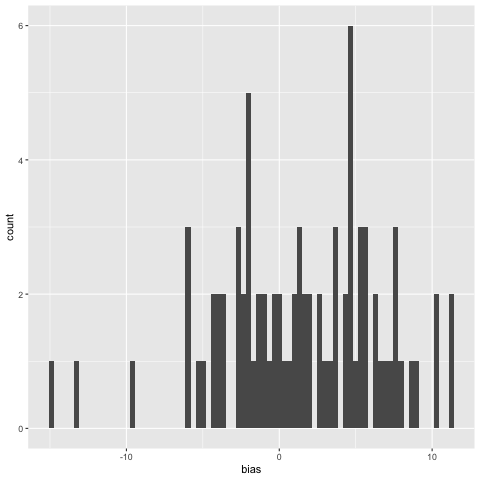

In [17]:
%%R

df_siena <- df %>% 
    filter(pollster=='Siena College/The New York Times Upshot') # Filter data to polls in presidential general elections only

# a basic histogram
ggplot(df_siena) +
    aes(x=bias) +
    geom_histogram(bins=80)

In [19]:
df['pollster'] == 'Siena College/The New York Times Upshot'

0        False
1        False
2        False
3        False
4        False
         ...  
10771    False
10772    False
10773    False
10774    False
10775    False
Name: pollster, Length: 10776, dtype: bool

In [22]:
df_siena = df[df.pollster == "Siena College/The New York Times Upshot"]

In [26]:
df_siena.type_detail.value_counts()

House-G    44
Pres-G     17
Sen-G      13
Gov-G       6
Pres-D      1
Sen-OS      1
Sen-GS      1
Name: type_detail, dtype: int64

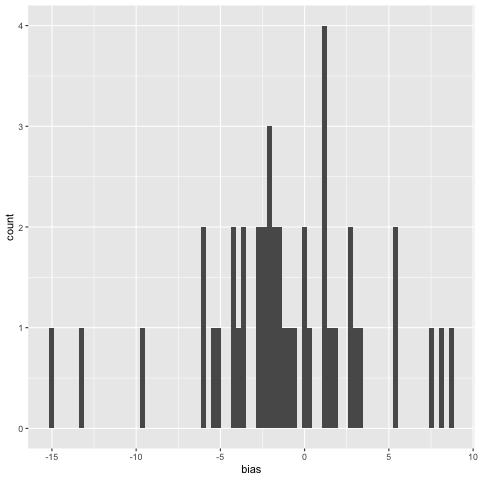

In [27]:
%%R

df_siena <- df %>% 
    filter(pollster=='Siena College/The New York Times Upshot',type_detail=='House-G') # Filter data to polls in presidential general elections only

# a basic histogram
ggplot(df_siena) +
    aes(x=bias) +
    geom_histogram(bins=80)

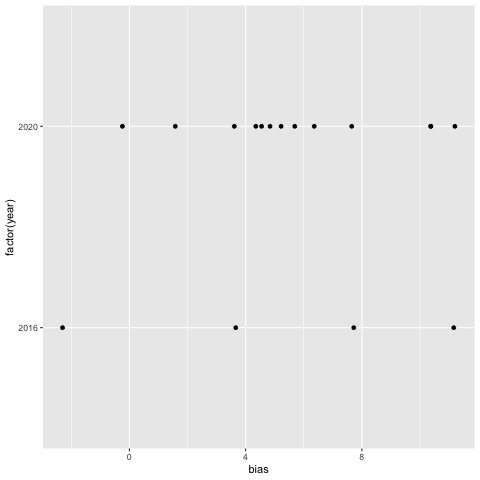

In [42]:
%%R

df_siena <- df %>% 
    filter(pollster=='Siena College/The New York Times Upshot',type_detail=='Pres-G') # Filter data to polls in presidential general elections only

# a basic histogram
ggplot(df_siena) +
    aes(x=bias,y=factor(year)) +
    geom_point()

In [ ]:
#here we can see that in 2020, most of the polls show bias to democrats.

#In 2020, they were close to being accurate on the General Presidential elections.

👉 **Jayhawk Consulting**

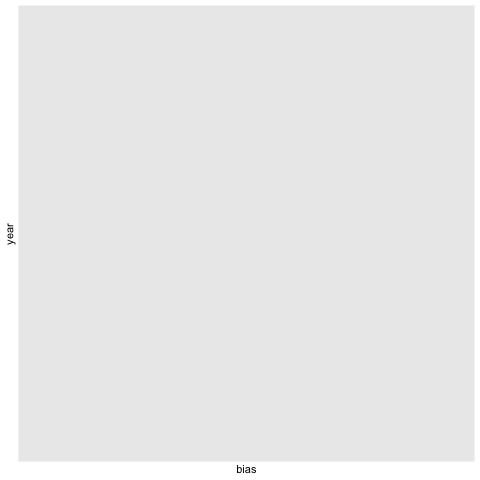

In [41]:
%%R

df_siena <- df %>% 
    filter(pollster=='Jayhawk Consulting',type_detail=='Pres-G') # Filter data to polls in presidential general elections only

# a basic histogram
ggplot(df_siena) +
    aes(x=bias,y=factor(year)) +
    geom_point()

👉 **Fox News/Beacon Research/Shaw & Co. Research**

👉 **Brown University**

👉 **American Research Group**

### Question 2: Which pollsters are the most accurate? Which are the least accurate?

👉 Which pollsters are the most accurate?

👉 Which are the least accurate?

### Question 2 Reflections

👉 Write a summary paragraph explaining how you decided what constitutes “most accurate” and "least accurate"?


👉 In bullet point form, name **methodological choices** you made in the process of determining which pollsters were the most and least accurate.


👉 In bullet point form, list the **limitations** of your approach 
